accuracy score of K-Means:  0.24
Confusion matrix of K-Means:
 [[ 0 50  0]
 [48  0  2]
 [14  0 36]]
accuracy score of EM:  0.36666666666666664
Confusion matrix of EM:
  [[50  0  0]
 [ 0  5 45]
 [ 0 50  0]]


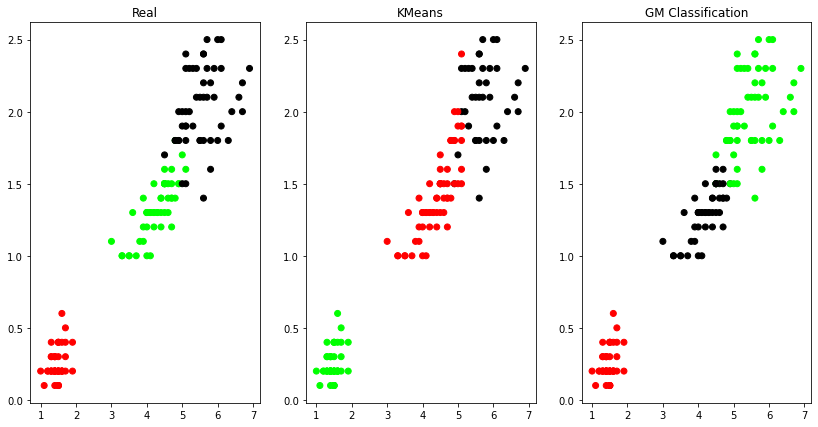

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import metrics


names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width', 'Class']
dataset = pd.read_csv("OneDrive\Desktop\8-dataset.csv", names=names)
x = dataset.iloc[:, :-1] 
label = {'Iris-setosa': 0,'Iris-versicolor': 1, 'Iris-virginica': 2} 
y = [label[c] for c in dataset.iloc[:, -1]]
plt.figure(figsize=(14,7))
colormap = np.array(['red','lime','black'])

plt.subplot(1,3,1)
plt.title('Real')
plt.scatter(x.Petal_Length,x.Petal_Width,c=colormap[y])

km=KMeans(n_clusters=3, random_state=0).fit(x)
plt.subplot(1,3,2)
plt.title('KMeans')
plt.scatter(x.Petal_Length,x.Petal_Width,c=colormap[km.labels_])
print('accuracy score of K-Means: ',metrics.accuracy_score(y, km.labels_))
print('Confusion matrix of K-Means:\n',metrics.confusion_matrix(y, km.labels_))

gm=GaussianMixture(n_components=3, random_state=0).fit(x)
gm_y_cluster=gm.predict(x)
plt.subplot(1,3,3)
plt.title('GM Classification')
plt.scatter(x.Petal_Length,x.Petal_Width,c=colormap[gm_y_cluster])
print('accuracy score of EM: ',metrics.accuracy_score(y, gm_y_cluster))
print('Confusion matrix of EM:\n ',metrics.confusion_matrix(y, gm_y_cluster))